In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

slim = tf.contrib.slim


%matplotlib inline

In [11]:
def testGetNetworkFn(self):
batch_size = 5
num_classes = 1000
for net in nets_factory.networks_map:
  with tf.Session() as sess:
    net_fn = nets_factory.get_network_fn(net, num_classes)
    # Most networks use 224 as their default_image_size
    image_size = getattr(net_fn, 'default_image_size', 224)
    inputs = tf.random_uniform((batch_size, image_size, image_size, 3))
    logits, end_points = net_fn(inputs)
    self.assertTrue(isinstance(logits, tf.Tensor))
    self.assertTrue(isinstance(end_points, dict))
    self.assertEqual(logits.get_shape().as_list()[0], batch_size)
    self.assertEqual(logits.get_shape().as_list()[-1], num_classes)

IndentationError: expected an indented block (<ipython-input-11-90e9c54260bd>, line 2)

In [2]:
a = np.arange(10)
print (type(a))


<class 'numpy.ndarray'>


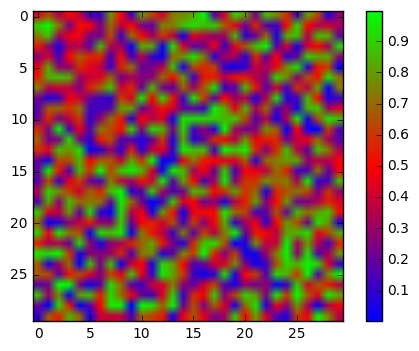

In [5]:
image = np.random.rand(30,30)
plt.imshow(image, cmap=plt.cm.brg)
plt.colorbar()
plt.show()

In [4]:
a = np.diag(np.arange(10))

In [5]:
a

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 9]])

In [11]:
a[2:5, 2:8]

array([[2, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0]])

In [7]:
a[:,4:]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [4, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0],
       [0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 9]])

In [9]:
a[::2,2]

array([0, 2, 0, 0, 0])

In [10]:
x = np.random.rand(255, 255, 255)

In [11]:
x.shape

(255, 255, 255)

In [12]:
aa = np.array([[1,2,3,4], [1,2,3], [1,2,3], [1,2,3]])

In [13]:
aa.shape

(4,)

In [12]:
from scipy import misc

In [13]:
lena = misc.face()

In [14]:
lena.shape

(768, 1024, 3)

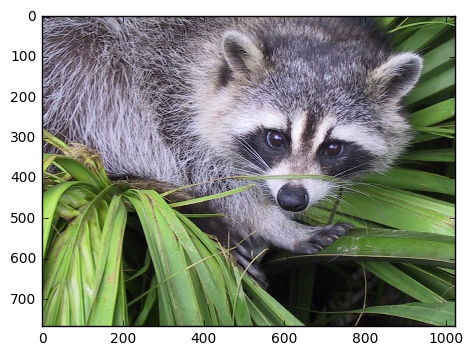

In [17]:
plt.imshow(lena, cmap=plt.cm.gray)

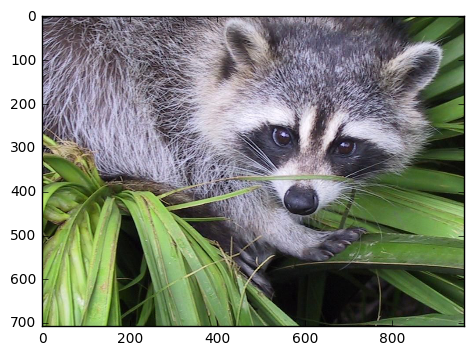

In [18]:
crop_lena = lena[30:-30, 30:-30]
plt.imshow(crop_lena)

In [19]:
arrs = [np.random.random((32, 32, 3))
        for i in range(50)]

In [20]:
res = np.concatenate([arr[np.newaxis] for arr in arrs])

In [21]:
res.shape

(50, 32, 32, 3)

In [22]:
res = np.array(arrs)
res.shape

(50, 32, 32, 3)

In [24]:
hello = tf.constant('hello, world!')
with tf.Session() as sess:
    print (sess.run(hello))

b'hello, world!'


In [3]:
import random
print (random.choice(['A', 'B', 'C']))


A


In [6]:
import os
filelist = []
print (len(filelist))
for filename in os.listdir('train'):
        #print (filename)
        filelist.append(filename)

0


In [13]:
random.choice(filelist)

'batch_496640'

In [14]:
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]


In [18]:
random.choice(listdir_fullpath('train'))

'train/batch_34816'

In [ ]:

# The width and height of the input images that we will be classifying.
WIDTH = 32
HEIGHT = 32

N_INPUT = WIDTH * HEIGHT * 3
N_CLASSES = 42
P_DROPOUT = 0.75

LEARNING_RATE = 0.001
TRAINING_ITERS = 1000
BATCH_SIZE = 1

# tf Graph input
x = tf.placeholder(tf.float32, [None, WIDTH, HEIGHT, 3])
y = tf.placeholder(tf.float32, [None, N_CLASSES])
keepProb = tf.placeholder(tf.float32) # dropout (keep probability)

def conv2d(img, w, b, s) :
    '''
    Create a convolutional layer with weights @w and biases @b
    '''
    conv = tf.nn.conv2d(img, w, strides=[1, s, s, 1], padding='SAME')
    bias = tf.nn.bias_add(conv, b)
    relu = tf.nn.relu(bias)
    
    print (relu.get_shape())

    return relu

def maxPool(img, k, s) :
    '''
    Create a max-pooling layer
    '''
   
    mPool = tf.nn.max_pool(img, ksize=[1, k, k, 1], strides=[1, s, s, 1], padding='SAME')
    
    print (mPool.get_shape())
    
    return mPool

def norm(layer, lsize) :
   
    
    norm = tf.nn.lrn(layer, lsize, bias=2.0, alpha=0.001 / 9.0, beta=0.75)
    
    print (norm.get_shape())
           
    return norm

def convolutionalNet(img, _weights, _biases, _dropout) :
    # First, reshape the input layer to match the dimensions of the images we
    # plan to classify.
    _X = img #tf.reshape(img, shape=[-1, WIDTH, HEIGHT, 3])

    # 1. Convolution layer, max-pooling, then dropout.
    conv1 = conv2d(_X, _weights['wc1'], _biases['bc1'], 4)
    pool1 = maxPool(conv1, 3, 2)
    norm1 = norm(pool1, 4)
    dropout1 = tf.nn.dropout(norm1, _dropout) # Is dropout necessary here?
    print ("dropout1.shape:", dropout1.get_shape())

    # 2. Second conv layer, setup identical
    conv2 = conv2d(dropout1, _weights['wc2'], _biases['bc2'], 1)
    pool2 = maxPool(conv2, 3, 2)
    norm2 = norm(pool2, 4)
    dropout2 = tf.nn.dropout(norm2, _dropout) # Is dropout necessary here?
    print ("dropout2.shape:", dropout2.get_shape())

    # 3. Third conv layer
    conv3 = conv2d(dropout2, _weights['wc3'], _biases['bc3'], 1)

    # 4. Fourth conv layer
    conv4 = conv2d(conv3, _weights['wc4'], _biases['bc4'], 1)

    # 5. Fifth conv layer
    conv5 = conv2d(conv4, _weights['wc5'], _biases['bc5'], 1)
    pool5 = maxPool(conv5, 3, 1)
    print ("pool5.shape:", pool5.get_shape())

    # 6. Fully connected layer 1
    wd1Shape = _weights['wd1'].get_shape().as_list()
    print (wd1Shape)
    fc1 = tf.reshape(pool5, [-1, wd1Shape[0]])
    print ("fc1.shape:", fc1.get_shape())

    mul1 = tf.matmul(fc1, _weights['wd1']) + _biases['bd1']
    print ("mul1.shape:", mul1.get_shape())
    relu1 = tf.nn.relu(mul1)
    print ("relu1.shape:", relu1.get_shape())

    # 7. Fully connected layer 2
    mul2 = tf.matmul(relu1, _weights['wd2']) + _biases['bd2']
    print ("mul2.shape:", mul2.get_shape())
    relu2 = tf.nn.relu(mul2)
    print ("relu2.shape:", relu2.get_shape())

    # Output layer
    out = tf.matmul(relu2, _weights['out']) + _biases['out']
    print ("out.shape:", out.get_shape())
    print ("out: ", out)

    return out

def buildModel() :
    # Store layers weight & bias
    weights = { # AKA Kernels
        'wc1': tf.Variable(tf.random_normal([11, 11, 3, 96])),
        'wc2': tf.Variable(tf.random_normal([5, 5, 96, 192])),
        'wc3': tf.Variable(tf.random_normal([3, 3, 192, 384])),
        'wc4': tf.Variable(tf.random_normal([3, 3, 384, 384])),
        'wc5': tf.Variable(tf.random_normal([3, 3, 384, 256])),

        'wd1': tf.Variable(tf.random_normal([256, 4096])),
        'wd2': tf.Variable(tf.random_normal([4096, 1024])),

        'out': tf.Variable(tf.random_normal([1024, N_CLASSES]))
    }

    biases = {
        'bc1': tf.Variable(tf.random_normal([96])),
        'bc2': tf.Variable(tf.random_normal([192])),
        'bc3': tf.Variable(tf.random_normal([384])),
        'bc4': tf.Variable(tf.random_normal([384])),
        'bc5': tf.Variable(tf.random_normal([256])),

        'bd1': tf.Variable(tf.random_normal([4096])),
        'bd2': tf.Variable(tf.random_normal([1024])),

        'out': tf.Variable(tf.random_normal([N_CLASSES]))
    }

    result = convolutionalNet(x, weights, biases, keepProb)

    return result
